<a href="https://colab.research.google.com/github/yeb2Binfang/CS_9223_Visualization_for_ML/blob/main/HW/HW2/HW2-MLChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# HW2 - Model Building and Visualization

### Due: 03/11/2020 - 11pm

In this homework, you will use AutoML and model analysis to solve a classification problem on a tabular dataset.

The dataset `data.csv` contains 30 numerical features (X0 - 29), 1 categorical feature (XC) and 1 target (last column, y). Your goal is to create the best model to predict y based on the data features.


In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/yeb2Binfang/CS_9223_Visualization_for_ML/main/HW/HW2/data.csv")
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,XC,y
0,0.985703,0.899527,2.332283,1.044273,1.141718,-1.656647,-1.409265,1.043518,-0.931461,-1.726754,0.149757,0.723953,0.654222,-0.128981,-0.448738,0.001453,1.068472,0.547043,-1.446777,0.846647,1.385378,0.217853,0.628801,0.511403,0.562767,-0.356514,0.867604,-0.218642,-0.336591,0.096781,C,0
1,0.539816,0.243602,1.636048,-0.562150,-0.235560,-1.316039,1.529069,-1.415871,-1.167266,-0.103195,1.264812,-0.046112,-0.052789,0.713823,0.489074,1.449449,-0.241008,-1.530879,-0.140254,-2.218684,0.129662,2.020398,0.734907,0.929244,-0.805046,0.268788,1.025799,1.112271,1.492585,-0.497020,E,0
2,-1.424483,-0.470533,0.095100,0.131981,1.168902,-0.827530,-1.233111,0.556679,-1.384065,-1.197944,-0.401762,0.242434,-1.063001,-0.000186,-1.625695,0.549367,1.792426,-0.684977,0.380994,-0.007497,0.640268,1.470933,-1.398526,-2.139636,-1.238090,-0.139802,-2.317249,0.113483,0.521594,1.269208,E,0
3,-1.034157,-1.054496,0.339467,-0.829151,0.012123,0.048887,0.573195,-0.189184,-0.674289,0.975835,-0.040081,-0.119562,0.765592,-0.589195,0.054909,0.670680,0.034362,-1.151614,-0.598841,0.278923,2.565787,0.881025,0.305298,-0.368107,-0.664859,0.225715,-0.865773,-0.026332,-0.209023,0.074814,E,0
4,0.177091,1.154216,1.004133,-0.724015,-0.508090,-0.478284,-0.524431,1.841560,-1.147140,0.435025,-0.385504,-1.895292,0.336079,-0.706587,0.058675,-0.318922,0.252725,-0.756372,-1.619190,-0.413788,0.909173,0.515647,1.095991,-0.993104,-0.775456,0.938553,0.662388,0.483111,-0.910481,1.544431,E,0


In order to create this model, you will have to:
1. Explore the data using visualizations and statistics
    * What are the feature distributions (compute histograms for them)?
    * Is the data correlated?
        * Check Pearson correlation between columns. 
        * Try looking at the scatterplot of the dimensions.
    * Can you remove unnecessary features?
        * Alternatively, can you reduce the dimensionality of the data with PCA?
2. Preprocess the data
    * One-Hot-Encode categorical variable
    * Check if you need to normalize the data
3. Solve the classification problem using Auto-Sklearn. Try different dataset inputs.
    * With / Without categorical feature
    * With / Without normalization
    * With / Without feature selection / PCA
4. Explore the models using PipelineProfiler. What primitives perform well for this task?
4. Select the best model out of your experiments (split the data in a 70/30 Training/Validation set)
    
    
    

## Explore the data using visualizations and statistics
* What are the feature distributions (compute histograms for them)?
* Is the data correlated?
 * Check Pearson correlation between columns.
 * Try looking at the scatterplot of the dimensions.
* Can you remove unnecessary features?
 * Alternatively, can you reduce the dimensionality of the data with PCA?

### feature distributions

https://blog.csdn.net/qq_36187610/article/details/110188100#:~:text=%E4%B8%80.%20%E4%BB%80%E4%B9%88%E6%98%AF%E7%89%B9%E5%BE%81%E5%88%86%E5%B8%83,%E7%B1%BB%E5%88%AB%E6%A0%B7%E6%9C%AC%E7%9A%84%E5%88%86%E5%B8%83%E6%83%85%E5%86%B5%E3%80%82&text=%E6%A0%B7%E6%9C%AC%E5%88%86%E5%B8%83%E6%8C%87%E7%9A%84%E5%B0%B1%E6%98%AF,%E6%A0%B7%E6%9C%AC%E5%88%86%E5%B8%83%E4%B8%BA%E5%9D%87%E5%8C%80%E5%88%86%E5%B8%83%E3%80%82

https://peltarion.com/knowledge-center/documentation/datasets-view/edit-an-imported-dataset-for-use-in-experiments/feature-distribution

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
column_name = df.columns
print(column_name)
column_names_part1 = column_name[0:10]
column_names_part2 = column_name[10:20]
column_names_part3 = column_name[20:30]
print(column_names_part1)
print(column_names_part2)
print(column_names_part3)

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'XC',
       'y'],
      dtype='object')
Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'], dtype='object')
Index(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19'], dtype='object')
Index(['X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29'], dtype='object')


#### columns[0:9] distributions

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

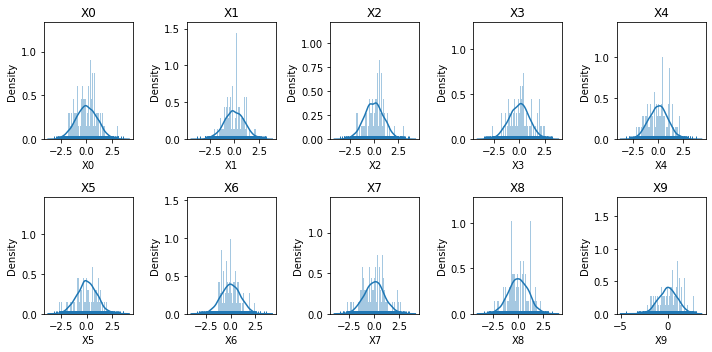

In [ ]:
plt.figure(figsize=(10,5))
for i, name in enumerate(column_names_part1):
  plt.subplot(2,5,i+1)
  sns.distplot(df[name], bins=3000, hist=True, kde=True, norm_hist=False, rug=True,
              vertical=False, axlabel=None, label=None, ax=None,
              fit=None)
  plt.title(name)
  plt.tight_layout()
plt.show()


#### columns[10:19] distributions

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

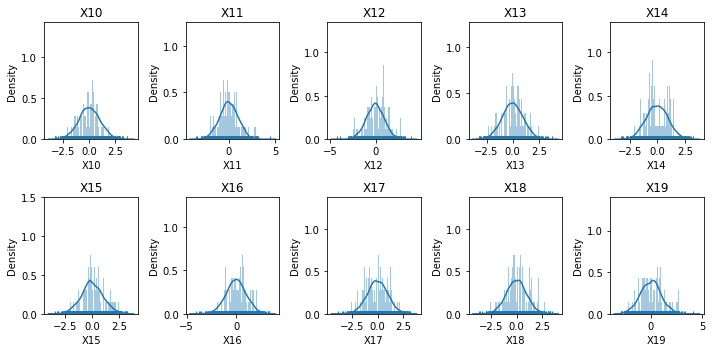

In [ ]:
plt.figure(figsize=(10,5))
for i, name in enumerate(column_names_part2):
  plt.subplot(2,5,i+1)
  sns.distplot(df[name], bins=3000, hist=True, kde=True, norm_hist=False, rug=True,
              vertical=False, axlabel=None, label=None, ax=None,
              fit=None)
  plt.title(name)
  plt.tight_layout()
plt.show()

#### columns[20:29] distributions

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

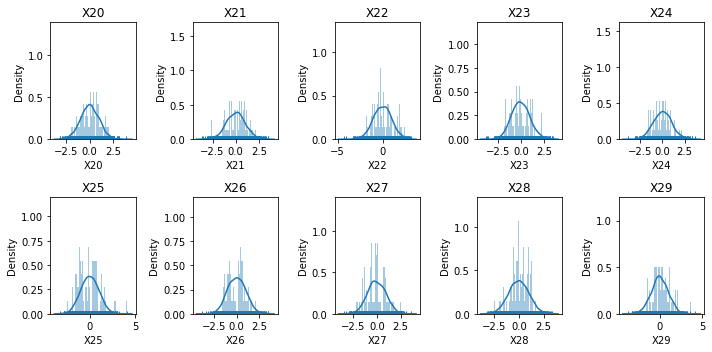

In [ ]:
plt.figure(figsize=(10,5))
for i, name in enumerate(column_names_part3):
  plt.subplot(2,5,i+1)
  sns.distplot(df[name], bins=3000, hist=True, kde=True, norm_hist=False, rug=True,
              vertical=False, axlabel=None, label=None, ax=None,
              fit=None)
  plt.title(name)
  plt.tight_layout()
plt.show()

#### distribution of the last column, which is the categorical data

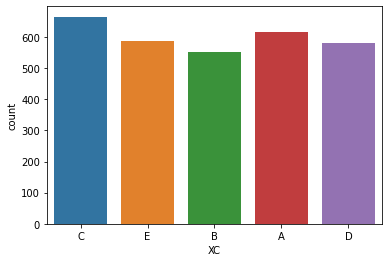

In [ ]:
sns.countplot(x =df['XC'], data = df)

### label distribution

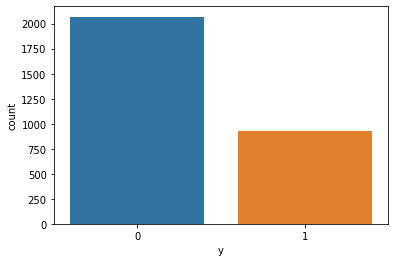

In [ ]:
sns.countplot(x =df['y'], data = df)

### corelated or not

Here, we will draw the scatter plot to check if any two columns are correlated or not.

https://www.youtube.com/watch?v=m0fs0v5GGlg&t=1753

In [4]:
column_names=column_name[0:30]

In [10]:
def correlate_plot(column_X):
  plt.figure(figsize=(24,16))
  count=0
  for i, name in enumerate(column_names):
    if column_X==name:
      continue
    count+=1
    plt.subplot(5,7,count)
    plt.scatter(df[column_X],df[name])
    plt.xlabel(column_X)
    plt.ylabel(name)
    plt.tight_layout()
  plt.show()

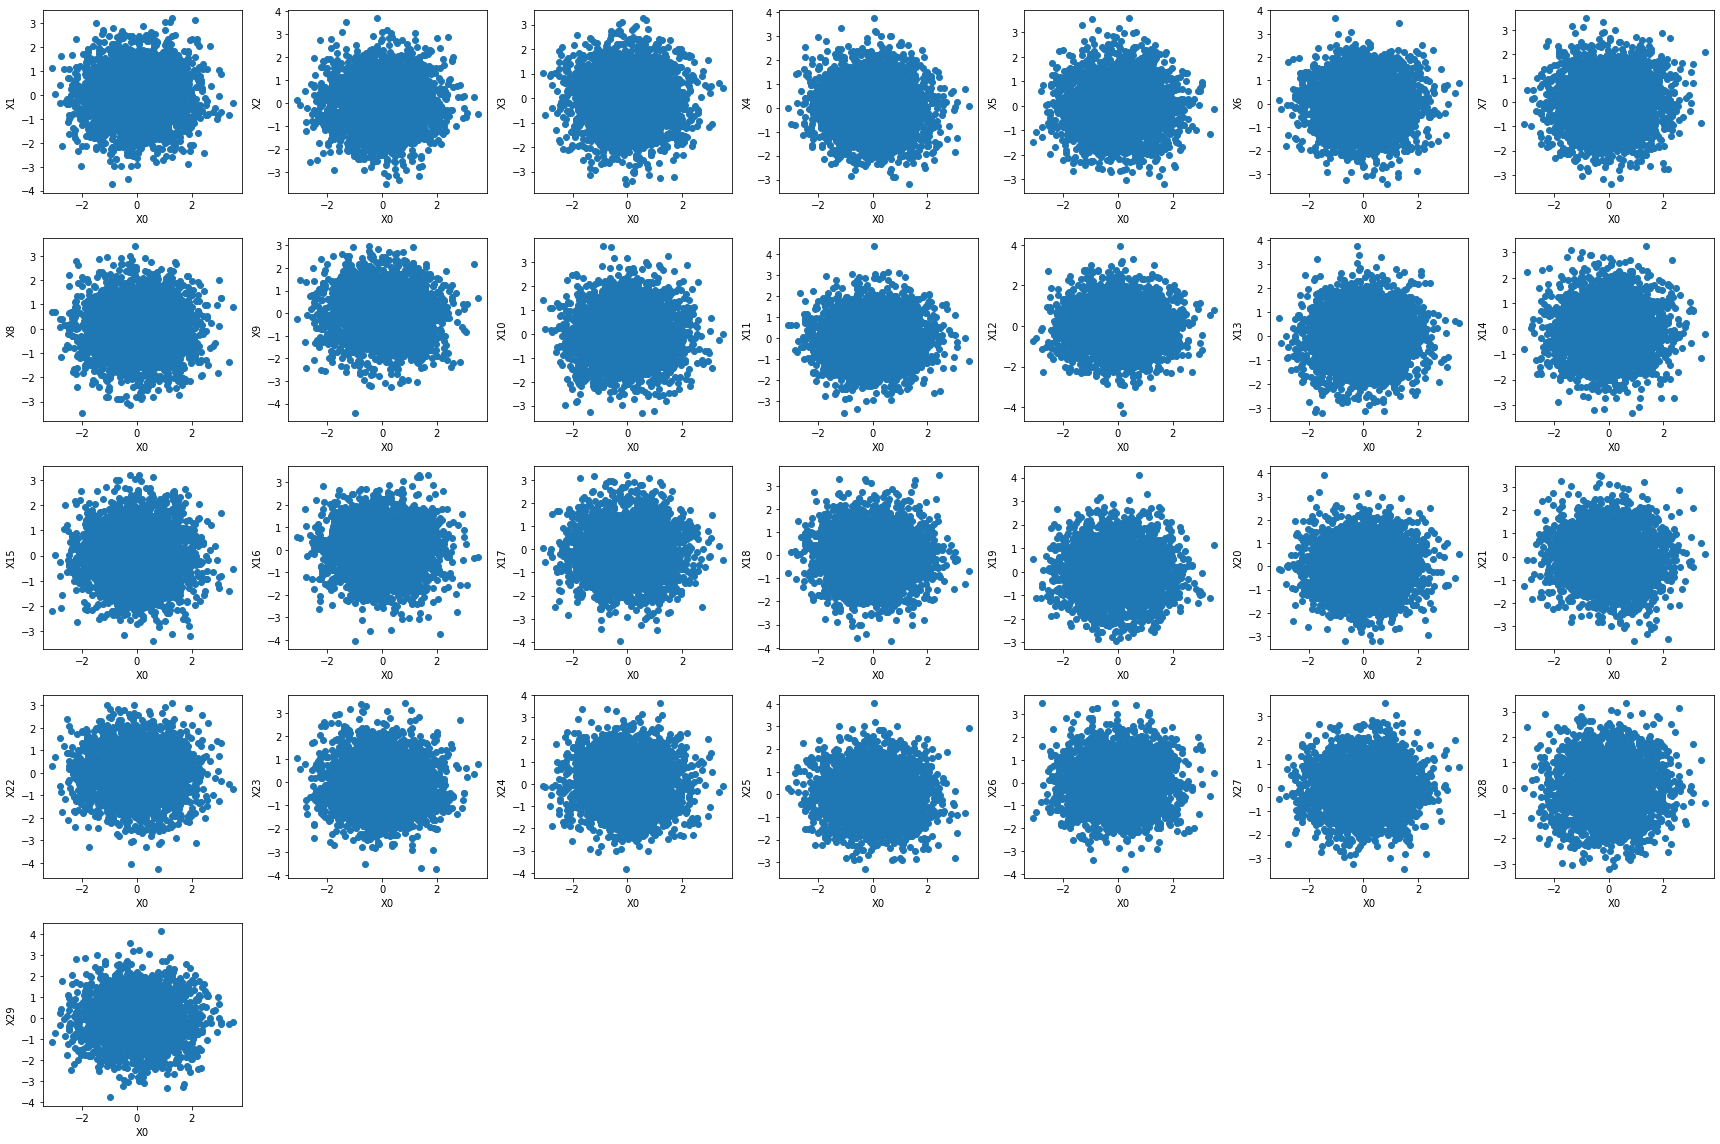

In [11]:
correlate_plot('X0')

### Heatmap

We can draw the heatmap too to check if correlated.

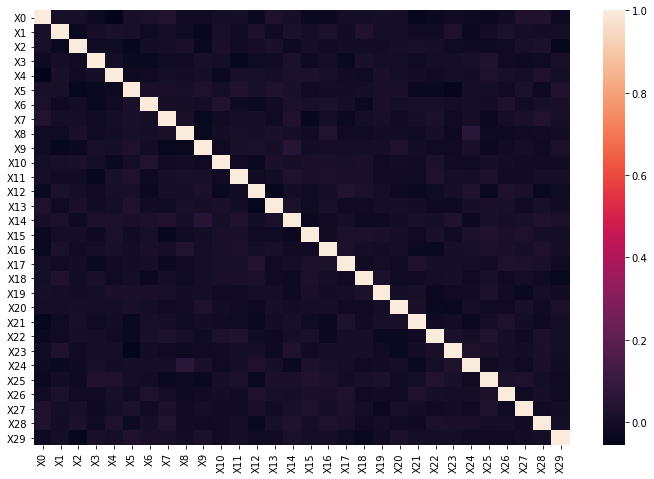

In [ ]:
corrmat = df[column_names].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corrmat)


Pearson Correlation Coefficient

In [ ]:
eff = np.corrcoef(df[column_names],df[column_names])
print(eff)

[[ 1.          0.01470255  0.2196495  ...  0.3171451   0.11454422
  -0.01698908]
 [ 0.01470255  1.         -0.01223577 ...  0.28195644 -0.01925399
   0.04784112]
 [ 0.2196495  -0.01223577  1.         ...  0.22286114  0.0240058
   0.00445369]
 ...
 [ 0.3171451   0.28195644  0.22286114 ...  1.          0.05344548
  -0.10820169]
 [ 0.11454422 -0.01925399  0.0240058  ...  0.05344548  1.
  -0.10111466]
 [-0.01698908  0.04784112  0.00445369 ... -0.10820169 -0.10111466
   1.        ]]


### PCA

In [5]:
X = df[column_names]
print(X)
component = np.arange(1,31)
print(component)

            X0        X1        X2  ...       X27       X28       X29
0     0.985703  0.899527  2.332283  ... -0.218642 -0.336591  0.096781
1     0.539816  0.243602  1.636048  ...  1.112271  1.492585 -0.497020
2    -1.424483 -0.470533  0.095100  ...  0.113483  0.521594  1.269208
3    -1.034157 -1.054496  0.339467  ... -0.026332 -0.209023  0.074814
4     0.177091  1.154216  1.004133  ...  0.483111 -0.910481  1.544431
...        ...       ...       ...  ...       ...       ...       ...
2995  0.127214 -0.644439 -0.356251  ...  0.673261 -0.072575  0.233888
2996  0.427700  1.460896 -1.260326  ...  1.172911 -0.917354  0.126003
2997 -0.880540  0.678472  0.493897  ... -1.641217  0.287025  0.591607
2998  0.151291 -0.949928 -1.960683  ...  1.057203 -1.335579 -0.108947
2999  1.351919 -0.353120 -0.918519  ...  0.863792  0.551103 -1.432635

[3000 rows x 30 columns]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [6]:
from sklearn.decomposition import PCA
import numpy as np

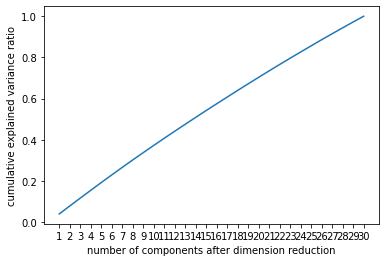

In [7]:
pca_line = PCA().fit(X)
plt.plot(component,np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks(component) 
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

## Preprocess the data
* One-Hot-Encode categorical variable
* Check if you need to normalize the data

In [8]:
from sklearn.preprocessing import OneHotEncoder


In [9]:
X_last = df['XC'].values.reshape(-1,1)

X_last=OneHotEncoder(categories='auto').fit_transform(X_last).toarray()
df_X_last = pd.DataFrame(X_last,columns=['A','B','C','D','E'])
df_X_last[0:5]

,A,B,C,D,E
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0


In [10]:
newdata = pd.concat([df[column_names],df_X_last],axis=1)
newdata[0:5]

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,A,B,C,D,E
0,0.985703,0.899527,2.332283,1.044273,1.141718,-1.656647,-1.409265,1.043518,-0.931461,-1.726754,0.149757,0.723953,0.654222,-0.128981,-0.448738,0.001453,1.068472,0.547043,-1.446777,0.846647,1.385378,0.217853,0.628801,0.511403,0.562767,-0.356514,0.867604,-0.218642,-0.336591,0.096781,0.0,0.0,1.0,0.0,0.0
1,0.539816,0.243602,1.636048,-0.562150,-0.235560,-1.316039,1.529069,-1.415871,-1.167266,-0.103195,1.264812,-0.046112,-0.052789,0.713823,0.489074,1.449449,-0.241008,-1.530879,-0.140254,-2.218684,0.129662,2.020398,0.734907,0.929244,-0.805046,0.268788,1.025799,1.112271,1.492585,-0.497020,0.0,0.0,0.0,0.0,1.0
2,-1.424483,-0.470533,0.095100,0.131981,1.168902,-0.827530,-1.233111,0.556679,-1.384065,-1.197944,-0.401762,0.242434,-1.063001,-0.000186,-1.625695,0.549367,1.792426,-0.684977,0.380994,-0.007497,0.640268,1.470933,-1.398526,-2.139636,-1.238090,-0.139802,-2.317249,0.113483,0.521594,1.269208,0.0,0.0,0.0,0.0,1.0
3,-1.034157,-1.054496,0.339467,-0.829151,0.012123,0.048887,0.573195,-0.189184,-0.674289,0.975835,-0.040081,-0.119562,0.765592,-0.589195,0.054909,0.670680,0.034362,-1.151614,-0.598841,0.278923,2.565787,0.881025,0.305298,-0.368107,-0.664859,0.225715,-0.865773,-0.026332,-0.209023,0.074814,0.0,0.0,0.0,0.0,1.0
4,0.177091,1.154216,1.004133,-0.724015,-0.508090,-0.478284,-0.524431,1.841560,-1.147140,0.435025,-0.385504,-1.895292,0.336079,-0.706587,0.058675,-0.318922,0.252725,-0.756372,-1.619190,-0.413788,0.909173,0.515647,1.095991,-0.993104,-0.775456,0.938553,0.662388,0.483111,-0.910481,1.544431,0.0,0.0,0.0,0.0,1.0


We do not need to normalize the data

In [11]:
from sklearn import preprocessing
normalized_arr = preprocessing.normalize(X)
print(normalized_arr[0:5])

[[ 1.83939616e-01  1.67858611e-01  4.35221888e-01  1.94869258e-01
   2.13053360e-01 -3.09142988e-01 -2.62979526e-01  1.94728470e-01
  -1.73817660e-01 -3.22225433e-01  2.79457702e-02  1.35095232e-01
   1.22082730e-01 -2.40688754e-02 -8.37378776e-02  2.71170380e-04
   1.99385096e-01  1.02082310e-01 -2.69979656e-01  1.57990851e-01
   2.58522111e-01  4.06529993e-02  1.17339094e-01  9.54316812e-02
   1.05016639e-01 -6.65282307e-02  1.61901587e-01 -4.08002477e-02
  -6.28103637e-02  1.80601035e-02]
 [ 9.30829190e-02  4.20054163e-02  2.82110995e-01 -9.69339458e-02
  -4.06186319e-02 -2.26930444e-01  2.63664086e-01 -2.44144808e-01
  -2.01276780e-01 -1.77942983e-02  2.18097076e-01 -7.95126638e-03
  -9.10261160e-03  1.23087638e-01  8.43332276e-02  2.49934889e-01
  -4.15580324e-02 -2.63976141e-01 -2.41846616e-02 -3.82577468e-01
   2.23581595e-02  3.48386138e-01  1.26723186e-01  1.60233538e-01
  -1.38817691e-01  4.63483358e-02  1.76883028e-01  1.91793792e-01
   2.57372884e-01 -8.57032986e-02]
 [-2.3

## Auto ML

In [12]:
!apt-get install swig -y
!pip install Cython numpy

# sometimes you have to run the next command twice on colab
# I haven't figured out why
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [13]:
!pip install scikit-learn==0.24

In [14]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
X = newdata
y = df['y']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)
automl = autosklearn.classification.AutoSklearnClassifier()
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))


ImportError: ignored

### Homework submission

You should submit your homework on github classroom. The submission should contain:
- Jupyter Notebook with the code and output of your experiments
- Report (PDF) describing your experiments and results (steps 1-5)
    - Data insights (visualizations)
    - AutoML experiments
    - PipelineProfiler insights (best pipeline in the ensemble, primitives most correlated with high scores, ...)
    - What is the best model accuracy on held out data?